In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import seaborn as sns
%matplotlib widget


In [9]:
med = []
for i in range(10):
    med.append(np.loadtxt(f"0606/med{i+1}.txt", delimiter=","))

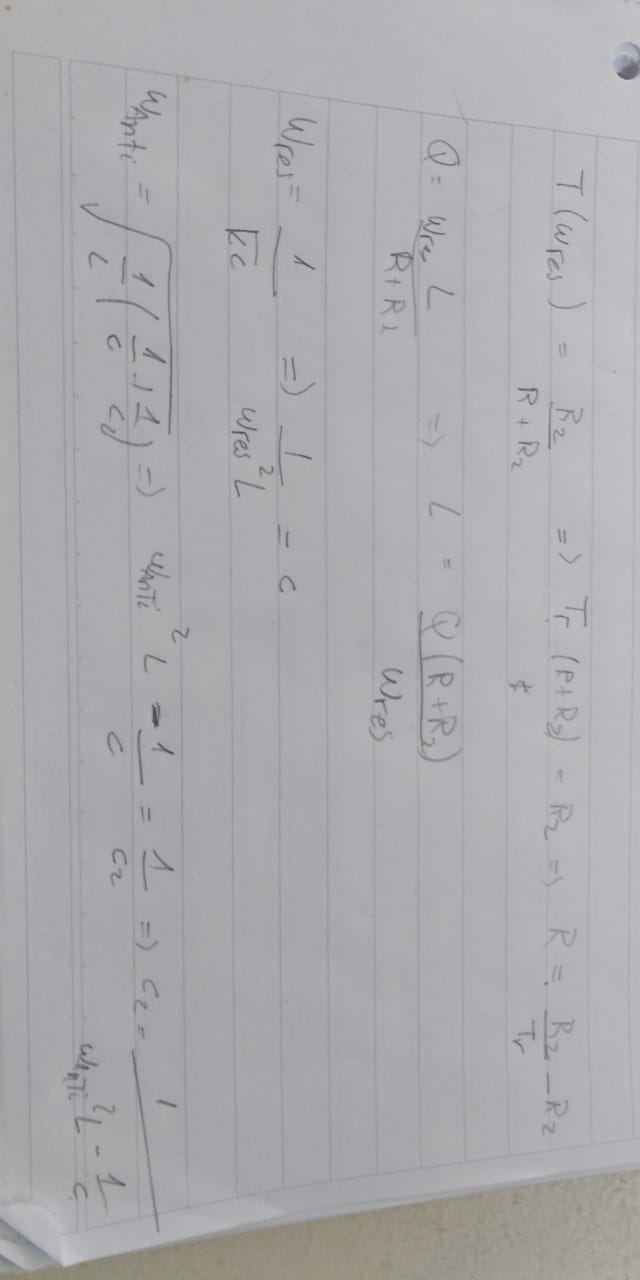

In [19]:
pi2 = 2*np.pi

T_res = 0.64446
Q = 8332
w_res = 50095 *  pi2
w_antires = 50284 *pi2

R_2 = 10000 #ohms

R = (R_2/T_res) - R_2
L = (Q*(R+R_2))/w_res
C = 1/(L*w_res**2)
C2 = 1/(L*w_antires**2 - 1/C)
Rg = 20


In [23]:
def transf(s,r,C,L,Co,R,Rg):
    z1 = r + s*L + 1/(s*C)
    z2 = 1/(s*Co)
    z = (1/z1 + 1/z2)**-1
    div_1 = R/(z + R)
    div_2 = R/(Rg+R)
    return ((div_1*div_2))

def fase(T):
    trans = np.copy(T)
    i = trans.imag
    r = trans.real
    fi = -np.arctan2(i,r)
    return(fi)


# R = 5516.86
# L = 410.75
# C = 2.4574e-14
# C2 = 3.25054e-12
# R_2 = 10000
frecs_muchas = np.linspace(min(med[4][:,0]), max(med[4][:,0]), 10000)

t = transf(frecs_muchas*pi2*1j,R,C,L,C2,R_2,Rg)
fase_as = fase(t)


fig, (ax1,ax2) = plt.subplots(2,1, figsize =(12,8) ,sharex = True)

ax1.plot(med[4][:,0], (2*med[4][:,1]), '.k',label = 'Datos adquiridos')
ax1.plot(frecs_muchas,np.abs(t), 'r-', label = 'Simulacion')
ax1.set_yscale('log')
ax1.grid()
ax1.set_ylabel('Transferencia',fontsize=12)

ax2.plot(med[4][:,0], med[4][:,2], '.k',label = 'Datos adquiridos')
ax2.plot(frecs_muchas, (fase_as*360/pi2)-15,'-r', label = 'Datos Simulacion') #el -15 es del offset
ax2.grid()
ax2.set_xlabel('Frecuencia [Hz]',fontsize=12)
ax2.set_ylabel('Fase [grad]',fontsize=12)
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …